##基礎演習S 後半第2回

NE21-1228F
鈴木　拓己


### Ex.2-4　NE2022シラバスの形態素解析とWord Cloud
##### ネットワーク情報学部専門科目全体のシラバス（「NE2022」フォルダ（ディレクトリ）内に収納）についてWord Cloudを描きたい（品詞は名詞, 形容詞, 動詞とし，頻度の多い方から150の形態素に限定しよう）．
---
#####【問題】 
1. 以下に示すRスクリプトの< >部分を補って完成し，処理の流れを簡潔に説明しなさい．  
1. Word Cloudの図を示しなさい．  

##### 【ヒント】
* 「NE2022」フォルダを圧縮した「NE2022.zip」ファイルは事前にセッションストレージにアップしておく（スクリプトの最初で展開する）．
* docDF関数による形態素（頻度）解析では，ファイル（パス）だけでなく，フォルダ（パス）を関数の引数にとることができる（従って，getMorph関数を使用できる）．
* また，その場合，フォルダ内の特定のファイル（の形態素頻度）は，docDF関数が返すデータフレームの特定の列（4列目以降）に対応する．従って，科目全体の形態素頻度を求めるには，各行（=形態素に対応）ごとに4列目以降の列の値（頻度）の和を計算すればよい事が分かる．
*それには「rowSums」関数を用いることもできるが，ここでは，より汎用的な「apply」関数（と「sum」関数）で代用してみよう．


In [ ]:
system("apt -y install zip Z&& unzip NE2022.zip")    # フォルダ解凍

In [ ]:
system("apt -y install zip Z&& unzip /content/NE2022.zip")

In [2]:
library(RMeCab)
# [1]
getMorph <- function(fn, pos) {
  dat <- docDF(fn, type =1, pos)
  names(dat)[4] <- "FREQ" # 列名の4番目を"FREQ"に変更
  ne <- grep("[[:punct:]]", dat$TERM)      # dat$TERM中のパンクチュエーションの位置（行番号）
  if(length(ne) != 0) dat <- dat[-ne,] # neの行削除　※neが空（要素数0）だとエラーになるので注意
  # (4) アルファベット1文字削除
  ne <- grep("^[Ａ-ＺA-Zａ-ｚa-z]$",dat$TERM,perl=TRUE)
  if(length(ne) != 0 && is.na(ne)) dat <- dat[-ne,]
  # (2,3,5) 数・接尾・非自立を削除
  ne <- which(dat$TERM %in% c("０","１","２","３","４","５","６","７","８","９","0","1","2","3","4","5","6","7","8","9","的","権","法","化","等","市","いる","こと","ため","の","を","する","と","だ","で","に","て","が","は","た","か","も","や"))
  if(length(ne) != 0) dat <- dat[-ne,]
  return(dat)
}

In [3]:
# [1]
library('RMeCab')

fn <- "NE2022"     # フォルダ
pos <- c("名詞","形容詞","動詞")
dat <- getMorph(fn, pos)
FREQ <- apply(dat[,4:ncol(dat)],1,sum)     # 「datの4列以降の部分」を「行方向」に「合計」
dat <- cbind(dat[,1:3],FREQ)      # 「datの1〜3列の部分」と「FREQ」を列方向に結合
head(dat); tail(dat)    # 最初と最後を確認

id <- dat[
  order(dat$FREQ, decreasing= TRUE),]	# datのFREQ列の値を降順にする行番号の並べ替え
dat <- id[1:150,]  # 頻度の上位150要素

ERROR: ignored

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message in brewer.pal(40, "Paired"):
“n too large, allowed maximum for palette Paired is 12
Returning the palette you asked for with that many colors
”
Warning message in wordcloud(dat$TERM, dat$FREQ, min.freq = 20, scale = c(4, 10), :
“各自 could not be fit on page. It will not be plotted.”
Warning message in wordcloud(dat$TERM, dat$FREQ, min.freq = 20, scale = c(4, 10), :
“フィードバック could not be fit on page. It will not be plotted.”
Warning message in wordcloud(dat$TERM, dat$FREQ, min.freq = 20, scale = c(4, 10), :
“報告 could not be fit on page. It will not be plotted.”
Warning message in wordcloud(dat$TERM, dat$FREQ, min.freq = 20, scale = c(4, 10), :
“成果 could not be fit on page. It will not be plotted.”
Warning message in wordcloud(dat$TERM, dat$FREQ, min.freq = 20, scale = c(4, 10), :
“到達 could not be fit on page. It will not be plotted.”
Warning message in wordcloud(dat$TERM, dat$FREQ, min.freq

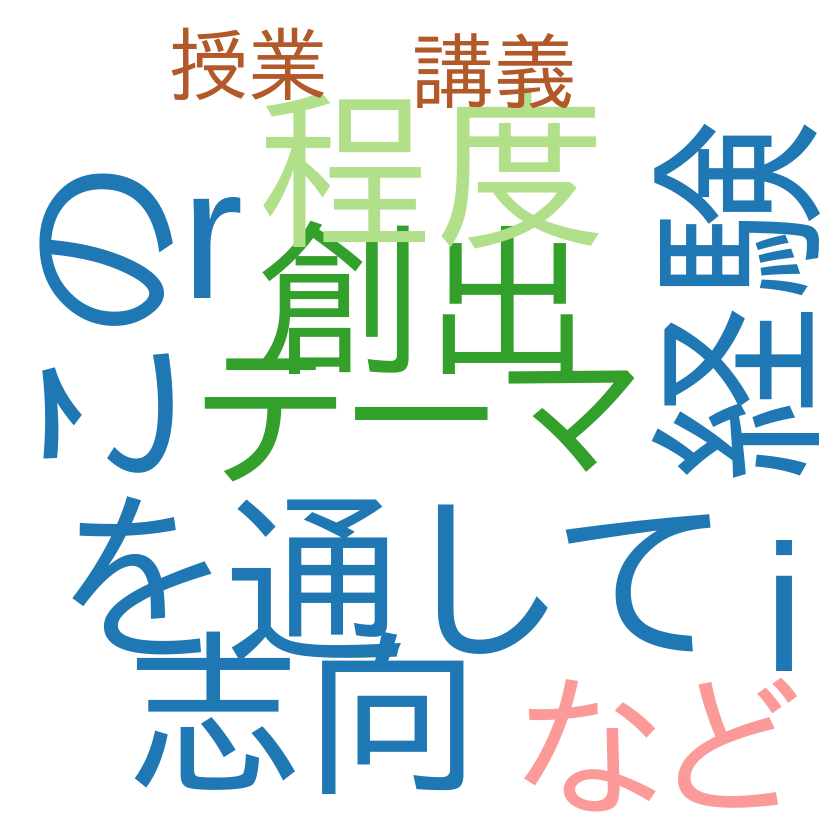

In [ ]:
# [2] Word Cloudの図
# 自分で記述してください．
install.packages(c("wordcloud"), dependencies=TRUE)
library('wordcloud')
wordcloud(dat$TERM, dat$FREQ, min.freq = 20, scale = c(4,10), colors = brewer.pal(40, "Paired"))

###<気づき>
授業、講義といった多く存在しそうなワードに加えてテーマ、創出などがピックアップされ、ネットワーク情報学部ならではのワードが上がった。

In [1]:
# 必要に応じて「ランタイム」＋「ランタイムを再起動」
# IPAフォントとmecabをインストール
system("apt-get install -y fonts-ipafont mecab libmecab-dev mecab-ipadic mecab-ipadic-utf8")
# フォント一覧を表示
# systemfonts::system_fonts()
install.packages("RMeCab", repos="http://rmecab.jp/R/")
library(RMeCab)
# グラフィクスパラメータのフォントファミリーをIPAGothicに
par(family="IPAGothic")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

